# Introduction
This notebook goes from (preprocessed) EEG data extraction to the fit of the HsMM-MVPA model in multiple conditions

In [1]:
import pandas as pd
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import itertools
import multiprocessing
import os
import mne
import pyhsmm_mvpa as hsmm

cpus = multiprocessing.cpu_count()
print(cpus)

%load_ext autoreload
%autoreload 2


16


# Loading EEG data
Then resample and create epochs (i.e. trial where time 0 is the time at which the stimulus appeared) and store in common xarray file (see https://docs.xarray.dev/en/stable/ for more info on that format)

In [2]:
hsmm.read_mne_EEG#Note the use of filtering and minimum and minimum both for epoch size and RTs, default values will likely not always be a good fit

<function pyhsmm_mvpa.read_mne_EEG(pfiles, event_id, resp_id, sfreq, events=None, tmin=-0.2, tmax=5, offset_after_resp=0.1, low_pass=0.5, high_pass=30, upper_limit_RT=5, lower_limit_RT=0.001, reject_threshold=None)>

In [3]:
event_id = {'accuracy/left/1':211,'accuracy/left/2':212,'accuracy/left/3':213,
           'accuracy/right/1':221,'accuracy/right/2':222,'accuracy/right/3':223,
            'speed/left/1':111,'speed/left/2':112,'speed/left/3':113, #conditions in the experiment
           'speed/right/1':121,'speed/right/2':122,'speed/right/3':123} # used for segmentation
resp_id = {'r_left':100,'r_right':200}#Response events
sfreq = 100#For resampling
cpus = 5 #if not enough RAM to load all participants data, better reduce the number of processes

path = '/home/gweindel/owncloud/projects/PHD/ForceEEG_2021/processing_EEG/preprocessed_data/'
subj_names = [x.split('_')[1].split('.')[0] for x in os.listdir(path) if 'preprocessed' in x]
print(subj_names)
subj_files = [path+ 'preprocessed_'+x+'.fif' for x in subj_names]

save_file = 'epoch_data_condition-wise.nc'
if save_file not in os.listdir():#avoids to loop again if notebook is restarted
    with multiprocessing.Pool(processes=cpus) as pool:
        epoch_data = pool.starmap(hsmm.read_mne_EEG, 
        zip([[x] for x in subj_files], itertools.repeat(event_id), itertools.repeat(resp_id),    
                itertools.repeat(sfreq), itertools.repeat(None), itertools.repeat(-.25), itertools.repeat(2), 
                itertools.repeat(.05), itertools.repeat(1), itertools.repeat(30), itertools.repeat(2), 
                itertools.repeat(.25)))
    
    epoch_data = xr.concat(epoch_data, pd.Series(subj_names, name="participant"),
                          fill_value={'event':'', 'data':np.nan})#not sure about the order of the particiapnt use with caution
    epoch_data.to_netcdf(save_file)
    epoch_data = xr.open_dataset(save_file)#For an unknown reason I need to re-read it
else:
    epoch_data = xr.open_dataset(save_file)
cpus = multiprocessing.cpu_count()

raw = mne.io.read_raw_fif(subj_files[0], preload=False, verbose=False)#loading for sensor position
positions = np.array(list(mne.channels.make_standard_montage('biosemi64').get_positions()['ch_pos'].values()))[:,:2]#loading standard positio

['S6', 'S18', 'S20', 'S1', 'S16', 'S14', 'S7', 'S15', 'S2', 'S3', 'S4', 'S5', 'S17', 'S10', 'S8', 'S12', 'S9', 'S11', 'S13']


/home/gweindel/owncloud/projects/RUGUU/pyhsmm-mvpa/pyhsmm_mvpa.py:40: RuntimeWarning: This filename (/home/gweindel/owncloud/projects/PHD/ForceEEG_2021/processing_EEG/preprocessed_data/preprocessed_S1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  data = mne.io.read_raw_fif(participant, preload=False, verbose=False)
/home/gweindel/owncloud/projects/RUGUU/pyhsmm-mvpa/pyhsmm_mvpa.py:40: RuntimeWarning: This filename (/home/gweindel/owncloud/projects/PHD/ForceEEG_2021/processing_EEG/preprocessed_data/preprocessed_S6.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  data = mne.io.read_raw_fif(participant, preload=False, verbo

Reading 0 ... 4594687  =      0.000 ...  4486.999 secs...
Reading 0 ... 4798463  =      0.000 ...  4685.999 secs...
Reading 0 ... 5106687  =      0.000 ...  4986.999 secs...
Reading 0 ... 5177343  =      0.000 ...  5055.999 secs...
Reading 0 ... 6117375  =      0.000 ...  5973.999 secs...
Downsampling to 100 Hz
Downsampling to 100 Hz
Downsampling to 100 Hz
Downsampling to 100 Hz
Downsampling to 100 Hz
Adding metadata with 13 columns
2448 matching events found
Setting baseline interval to [-0.25, 0.0] sec
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 2448 events and 226 original time points ...
Adding metadata with 13 columns
2448 matching events found
Setting baseline interval to [-0.25, 0.0] sec
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 2448 events and 226 original time points ...
Adding metadata with 13 columns
2448 matching events found
Setting baseline interval to [-0.25, 0.0] sec
Applying baseline correction (mode: me

/home/gweindel/owncloud/projects/RUGUU/pyhsmm-mvpa/pyhsmm_mvpa.py:40: RuntimeWarning: This filename (/home/gweindel/owncloud/projects/PHD/ForceEEG_2021/processing_EEG/preprocessed_data/preprocessed_S14.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  data = mne.io.read_raw_fif(participant, preload=False, verbose=False)


Reading 0 ... 5127167  =      0.000 ...  5006.999 secs...
Adding metadata with 13 columns
2376 matching events found
Setting baseline interval to [-0.25, 0.0] sec
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 2376 events and 226 original time points ...


/home/gweindel/owncloud/projects/RUGUU/pyhsmm-mvpa/pyhsmm_mvpa.py:40: RuntimeWarning: This filename (/home/gweindel/owncloud/projects/PHD/ForceEEG_2021/processing_EEG/preprocessed_data/preprocessed_S7.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  data = mne.io.read_raw_fif(participant, preload=False, verbose=False)


Reading 0 ... 4881407  =      0.000 ...  4766.999 secs...
93 bad epochs dropped
Applying reaction time trim to keep RTs between 0.25 and 2 seconds
234 bad epochs dropped


/home/gweindel/owncloud/projects/RUGUU/pyhsmm-mvpa/pyhsmm_mvpa.py:40: RuntimeWarning: This filename (/home/gweindel/owncloud/projects/PHD/ForceEEG_2021/processing_EEG/preprocessed_data/preprocessed_S15.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  data = mne.io.read_raw_fif(participant, preload=False, verbose=False)


Applying reaction time trim to keep RTs between 0.25 and 2 seconds
Reading 0 ... 4902911  =      0.000 ...  4787.999 secs...


/home/gweindel/owncloud/projects/RUGUU/pyhsmm-mvpa/pyhsmm_mvpa.py:40: RuntimeWarning: This filename (/home/gweindel/owncloud/projects/PHD/ForceEEG_2021/processing_EEG/preprocessed_data/preprocessed_S2.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  data = mne.io.read_raw_fif(participant, preload=False, verbose=False)


Reading 0 ... 5378047  =      0.000 ...  5251.999 secs...
133 bad epochs dropped
Applying reaction time trim to keep RTs between 0.25 and 2 seconds


/home/gweindel/owncloud/projects/RUGUU/pyhsmm-mvpa/pyhsmm_mvpa.py:40: RuntimeWarning: This filename (/home/gweindel/owncloud/projects/PHD/ForceEEG_2021/processing_EEG/preprocessed_data/preprocessed_S3.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  data = mne.io.read_raw_fif(participant, preload=False, verbose=False)


Reading 0 ... 4689919  =      0.000 ...  4579.999 secs...
Downsampling to 100 Hz
Downsampling to 100 Hz
Downsampling to 100 Hz
Downsampling to 100 Hz
Downsampling to 100 Hz
Adding metadata with 13 columns
2448 matching events found
Setting baseline interval to [-0.25, 0.0] sec
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 2448 events and 226 original time points ...
Adding metadata with 13 columns
2448 matching events found
Setting baseline interval to [-0.25, 0.0] sec
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 2448 events and 226 original time points ...
Adding metadata with 13 columns
2448 matching events found
Setting baseline interval to [-0.25, 0.0] sec
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 2448 events and 226 original time points ...
Adding metadata with 13 columns
2448 matching events found
Setting baseline interval to [-0.25, 0.0] sec
Applying baseline correction (mode: mean)
Us

/home/gweindel/owncloud/projects/RUGUU/pyhsmm-mvpa/pyhsmm_mvpa.py:40: RuntimeWarning: This filename (/home/gweindel/owncloud/projects/PHD/ForceEEG_2021/processing_EEG/preprocessed_data/preprocessed_S4.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  data = mne.io.read_raw_fif(participant, preload=False, verbose=False)


Reading 0 ... 4573183  =      0.000 ...  4465.999 secs...
991 bad epochs dropped
Applying reaction time trim to keep RTs between 0.25 and 2 seconds
109 bad epochs dropped
Applying reaction time trim to keep RTs between 0.25 and 2 seconds


/home/gweindel/owncloud/projects/RUGUU/pyhsmm-mvpa/pyhsmm_mvpa.py:40: RuntimeWarning: This filename (/home/gweindel/owncloud/projects/PHD/ForceEEG_2021/processing_EEG/preprocessed_data/preprocessed_S5.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  data = mne.io.read_raw_fif(participant, preload=False, verbose=False)


Reading 0 ... 4750335  =      0.000 ...  4638.999 secs...


/home/gweindel/owncloud/projects/RUGUU/pyhsmm-mvpa/pyhsmm_mvpa.py:40: RuntimeWarning: This filename (/home/gweindel/owncloud/projects/PHD/ForceEEG_2021/processing_EEG/preprocessed_data/preprocessed_S17.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  data = mne.io.read_raw_fif(participant, preload=False, verbose=False)


Reading 0 ... 4537343  =      0.000 ...  4430.999 secs...
36 bad epochs dropped
Applying reaction time trim to keep RTs between 0.25 and 2 seconds
103 bad epochs dropped
Applying reaction time trim to keep RTs between 0.25 and 2 seconds


/home/gweindel/owncloud/projects/RUGUU/pyhsmm-mvpa/pyhsmm_mvpa.py:40: RuntimeWarning: This filename (/home/gweindel/owncloud/projects/PHD/ForceEEG_2021/processing_EEG/preprocessed_data/preprocessed_S10.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  data = mne.io.read_raw_fif(participant, preload=False, verbose=False)
/home/gweindel/owncloud/projects/RUGUU/pyhsmm-mvpa/pyhsmm_mvpa.py:40: RuntimeWarning: This filename (/home/gweindel/owncloud/projects/PHD/ForceEEG_2021/processing_EEG/preprocessed_data/preprocessed_S8.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  data = mne.io.read_raw_fif(participant, preload=False, verb

Reading 0 ... 4814847  =      0.000 ...  4701.999 secs...
Reading 0 ... 5107711  =      0.000 ...  4987.999 secs...
Downsampling to 100 Hz
Downsampling to 100 Hz
Downsampling to 100 Hz
Downsampling to 100 Hz
Downsampling to 100 Hz
Adding metadata with 13 columns
2448 matching events found
Setting baseline interval to [-0.25, 0.0] sec
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 2448 events and 226 original time points ...
567 bad epochs dropped
Applying reaction time trim to keep RTs between 0.25 and 2 seconds


/home/gweindel/owncloud/projects/RUGUU/pyhsmm-mvpa/pyhsmm_mvpa.py:40: RuntimeWarning: This filename (/home/gweindel/owncloud/projects/PHD/ForceEEG_2021/processing_EEG/preprocessed_data/preprocessed_S12.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  data = mne.io.read_raw_fif(participant, preload=False, verbose=False)


Adding metadata with 13 columns
2448 matching events found
Setting baseline interval to [-0.25, 0.0] sec
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 2448 events and 226 original time points ...
Reading 0 ... 5602303  =      0.000 ...  5470.999 secs...
Adding metadata with 13 columns
2448 matching events found
Setting baseline interval to [-0.25, 0.0] sec
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 2448 events and 226 original time points ...
Adding metadata with 13 columns
2448 matching events found
Setting baseline interval to [-0.25, 0.0] sec
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 2448 events and 226 original time points ...
Adding metadata with 13 columns
2448 matching events found
Setting baseline interval to [-0.25, 0.0] sec
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 2448 events and 226 original time points ...
81 bad epochs dropped
Applying reactio

/home/gweindel/owncloud/projects/RUGUU/pyhsmm-mvpa/pyhsmm_mvpa.py:40: RuntimeWarning: This filename (/home/gweindel/owncloud/projects/PHD/ForceEEG_2021/processing_EEG/preprocessed_data/preprocessed_S9.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  data = mne.io.read_raw_fif(participant, preload=False, verbose=False)


Reading 0 ... 4972543  =      0.000 ...  4855.999 secs...


/home/gweindel/owncloud/projects/RUGUU/pyhsmm-mvpa/pyhsmm_mvpa.py:40: RuntimeWarning: This filename (/home/gweindel/owncloud/projects/PHD/ForceEEG_2021/processing_EEG/preprocessed_data/preprocessed_S11.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  data = mne.io.read_raw_fif(participant, preload=False, verbose=False)


154 bad epochs dropped
Applying reaction time trim to keep RTs between 0.25 and 2 seconds


/home/gweindel/owncloud/projects/RUGUU/pyhsmm-mvpa/pyhsmm_mvpa.py:40: RuntimeWarning: This filename (/home/gweindel/owncloud/projects/PHD/ForceEEG_2021/processing_EEG/preprocessed_data/preprocessed_S13.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  data = mne.io.read_raw_fif(participant, preload=False, verbose=False)


Reading 0 ... 5229567  =      0.000 ...  5106.999 secs...
Reading 0 ... 4797439  =      0.000 ...  4684.999 secs...
Downsampling to 100 Hz
Downsampling to 100 Hz
Downsampling to 100 Hz
Downsampling to 100 Hz
Adding metadata with 13 columns
2448 matching events found
Setting baseline interval to [-0.25, 0.0] sec
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 2448 events and 226 original time points ...
71 bad epochs dropped
Applying reaction time trim to keep RTs between 0.25 and 2 seconds
Adding metadata with 13 columns
2448 matching events found
Setting baseline interval to [-0.25, 0.0] sec
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 2448 events and 226 original time points ...
Adding metadata with 13 columns
2448 matching events found
Setting baseline interval to [-0.25, 0.0] sec
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 2448 events and 226 original time points ...
Adding metadata with 13 c

/tmp/ipykernel_455175/2288398678.py:31: RuntimeWarning: This filename (/home/gweindel/owncloud/projects/PHD/ForceEEG_2021/processing_EEG/preprocessed_data/preprocessed_S6.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(subj_files[0], preload=False, verbose=False)#loading for sensor position


In [4]:
epoch_data

<xarray.Dataset>
Dimensions:      (epochs: 2370, samples: 200, participant: 19, electrodes: 64)
Coordinates:
  * epochs       (epochs) int64 0 1 2 3 4 5 6 ... 2364 2365 2366 2367 2368 2369
  * samples      (samples) int64 0 1 2 3 4 5 6 7 ... 193 194 195 196 197 198 199
  * electrodes   (electrodes) object 'Fp1' 'AF7' 'AF3' 'F1' ... 'PO8' 'PO4' 'O2'
  * participant  (participant) object 'S6' 'S18' 'S20' 'S1' ... 'S9' 'S11' 'S13'
Data variables:
    data         (participant, epochs, electrodes, samples) float64 ...
    event        (participant, epochs) object ...
Attributes:
    sfreq:    100.0

## Applying standardization, variance scaling and PCA

In [6]:
hsmm_dat, PCs, explained_var, means = hsmm.transform_data(epoch_data,'participant',return_weights=True, n_comp=10)

# Applying HsMM for the speed condition

Initializing data for the speed condition

In [7]:
subset = hsmm_dat.where(epoch_data.event.str.contains('speed'),drop=True)
hsmm_speed_data = hsmm.stack_data(subset,'participant')
init_speed = hsmm.hsmm(hsmm_speed_data.data.T, hsmm_speed_data.starts.data, hsmm_speed_data.ends.data, 
                       sf=epoch_data.sfreq, cpus=cpus)

Estimating the different number of bump solution using the backward estimation (first estimate max_bump solution then estimate max_bump - 1 solution by iteratively removing one of the bump and pick the one with the highest likelihood)

In [8]:
bests_speed = init_speed.backward_estimation()
bests_speed

Estimating parameters for 5 bumps model


/home/gweindel/owncloud/projects/RUGUU/pyhsmm-mvpa/pyhsmm_mvpa.py:488: UserWarning: Using default parameters value for gamma parameters
  warnings.warn('Using default parameters value for gamma parameters')
/home/gweindel/owncloud/projects/RUGUU/pyhsmm-mvpa/pyhsmm_mvpa.py:491: UserWarning: Using default parameters value for magnitudes
  warnings.warn('Using default parameters value for magnitudes')


Parameters estimated for 5 bumps model
Estimating all solutions for 4 bumps
Estimating all solutions for 3 bumps
Estimating all solutions for 2 bumps
Estimating all solutions for 1 bumps


<xarray.Dataset>
Dimensions:      (n_bumps: 5, stage: 6, params: 2, component: 10, bump: 5,
                  samples: 193, trial: 20204)
Coordinates:
  * n_bumps      (n_bumps) int64 5 4 3 2 1
Dimensions without coordinates: stage, params, component, bump, samples, trial
Data variables:
    likelihoods  (n_bumps) float64 -3.748e+05 -6.762e+04 ... -7.842e+04
    parameters   (n_bumps, stage, params) float64 2.0 16.08 2.0 ... nan nan nan
    magnitudes   (n_bumps, component, bump) float64 -0.6406 0.5076 ... nan nan
    eventprobs   (n_bumps, samples, trial, bump) float64 0.0 0.0 0.0 ... nan nan

## Plotting the bump placement from this method

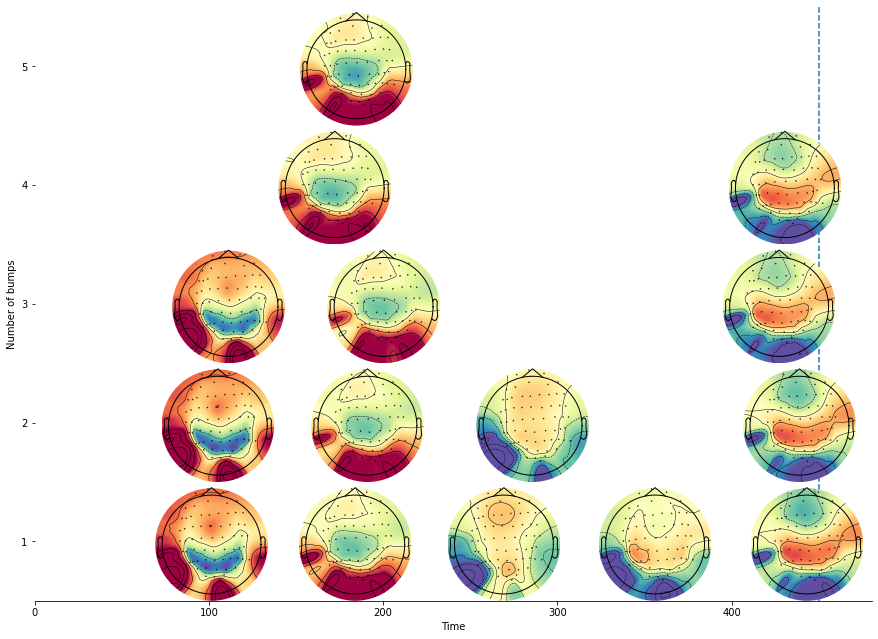

In [13]:
electrodes = xr.DataArray(hsmm.reconstruct(bests_speed.magnitudes, PCs, 
                            explained_var, means.data))

hsmm.plot_topo_timecourse(electrodes, init_speed.mean_bump_times(bests_speed.eventprobs),
                          raw.pick_types(eeg=True).info, bump_size=init_speed.bump_width_samples, time_step = 10, magnify=2, 
                          mean_rt = np.mean(hsmm_speed_data.ends.data - hsmm_speed_data.starts.data), 
                          figsize=(15,10), ylabels={'Number of bumps':np.arange(init_speed.max_bumps)+1})

In [14]:
temp = hsmm_speed_data.unstack().data
bests = bests_speed
init = init_speed

subjects_idx = epoch_data.participant.values
likelihoods_loo = []
cpus=5
all_n_bumps = []
for n_bumps in np.arange(1,init_speed.max_bumps+1):    
    with multiprocessing.Pool(processes=cpus) as pool:
        loo = pool.starmap(hsmm.LOOCV, 
            zip(itertools.repeat(temp),subjects_idx, itertools.repeat(n_bumps), 
                itertools.repeat(bests.sel(n_bumps=n_bumps)), itertools.repeat(epoch_data.sfreq)))
    all_n_bumps.append(loo)

loocv = xr.DataArray(np.array(all_n_bumps)[:,:,0].astype(np.float64), coords={"n_bump":np.arange(1,init.max_bumps+1),
                                                           "participants":np.array(all_n_bumps)[0,:,1]})
loocv_speed=loocv

Plotting LOOCV along with pvalues from the sign test

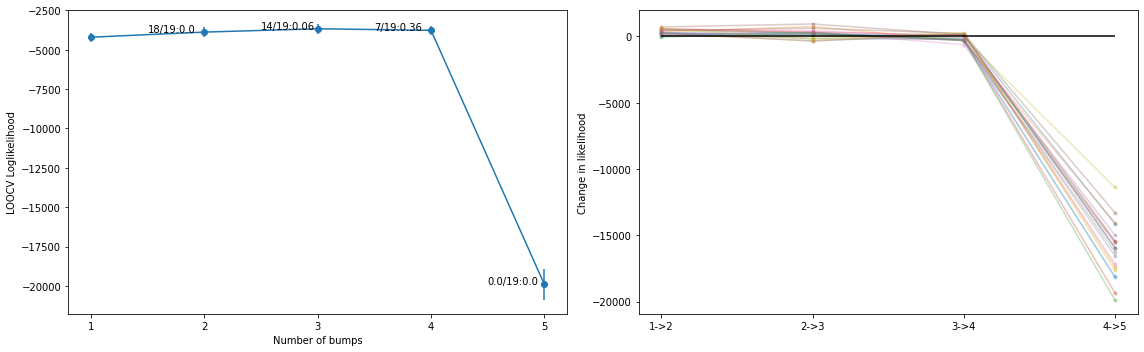

In [15]:
hsmm.plot_LOOCV(loocv_speed)

# Applying HsMM for the accuracy condition

Initializing data for the accuracy condition

In [16]:
subset = hsmm_dat.where(epoch_data.event.str.contains('accuracy'),drop=True)
hsmm_accuracy_data = hsmm.stack_data(subset,'participant')
init_accuracy = hsmm.hsmm(hsmm_accuracy_data.data.T, hsmm_accuracy_data.starts.data, hsmm_accuracy_data.ends.data, 
                       sf=epoch_data.sfreq, cpus=cpus)

In [17]:
init_accuracy = hsmm.hsmm(hsmm_accuracy_data.data.T, hsmm_accuracy_data.starts.data, hsmm_accuracy_data.ends.data, 
                       sf=epoch_data.sfreq, cpus=cpus)

Estimating the different number of bump solution using the backward estimation (first estimate max_bump solution then estimate max_bump - 1 solution by iteratively removing one of the bump and pick the one with the highest likelihood)

In [18]:
bests_accuracy = init_accuracy.backward_estimation()
bests_accuracy

Estimating parameters for 5 bumps model


/home/gweindel/owncloud/projects/RUGUU/pyhsmm-mvpa/pyhsmm_mvpa.py:488: UserWarning: Using default parameters value for gamma parameters
  warnings.warn('Using default parameters value for gamma parameters')
/home/gweindel/owncloud/projects/RUGUU/pyhsmm-mvpa/pyhsmm_mvpa.py:491: UserWarning: Using default parameters value for magnitudes
  warnings.warn('Using default parameters value for magnitudes')


Parameters estimated for 5 bumps model
Estimating all solutions for 4 bumps
Estimating all solutions for 3 bumps
Estimating all solutions for 2 bumps
Estimating all solutions for 1 bumps


<xarray.Dataset>
Dimensions:      (n_bumps: 5, stage: 6, params: 2, component: 10, bump: 5,
                  samples: 200, trial: 20965)
Coordinates:
  * n_bumps      (n_bumps) int64 5 4 3 2 1
Dimensions without coordinates: stage, params, component, bump, samples, trial
Data variables:
    likelihoods  (n_bumps) float64 -7.663e+04 -7.48e+04 ... -9.168e+04
    parameters   (n_bumps, stage, params) float64 2.0 2.684 2.0 ... nan nan nan
    magnitudes   (n_bumps, component, bump) float64 -0.8309 0.5698 ... nan nan
    eventprobs   (n_bumps, samples, trial, bump) float64 0.0 0.0 0.0 ... nan nan

## Plotting the bump placement from this method

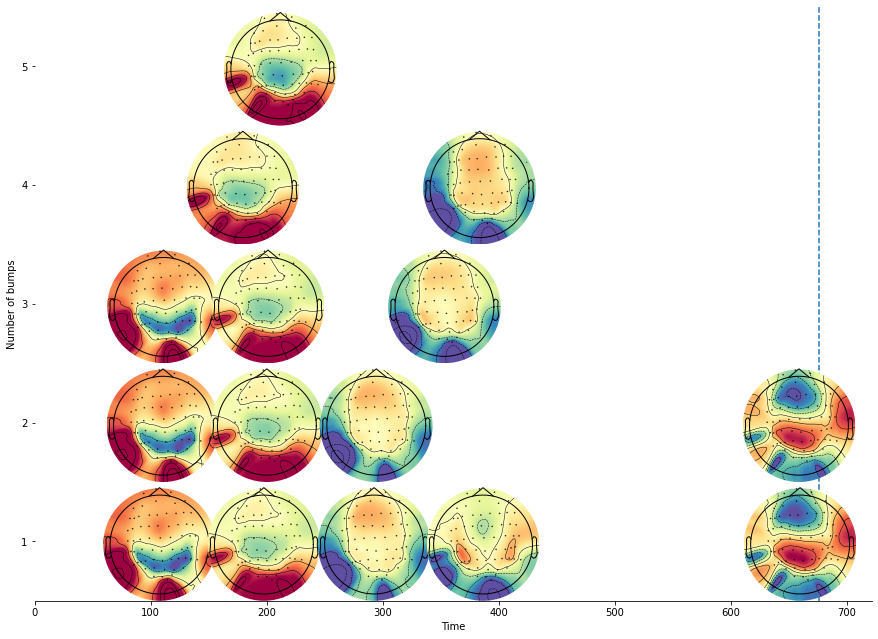

In [32]:
electrodes = xr.DataArray(hsmm.reconstruct(bests_accuracy.magnitudes, PCs, 
                            explained_var, means))

hsmm.plot_topo_timecourse(electrodes, init_accuracy.mean_bump_times(bests_accuracy.eventprobs),
                          raw.pick_types(eeg=True).info, bump_size=init_accuracy.bump_width_samples, time_step = 10, magnify=2, 
                          mean_rt = np.mean(hsmm_accuracy_data.ends.data - hsmm_accuracy_data.starts.data), 
                          figsize=(15,10), ylabels={'Number of bumps':np.arange(init_accuracy.max_bumps)+1})

In [20]:
temp = hsmm_accuracy_data.unstack().data
bests = bests_accuracy
init = init_accuracy

subjects_idx = epoch_data.participant.values
likelihoods_loo = []
cpus=5
all_n_bumps = []
for n_bumps in np.arange(1,init.max_bumps+1):    
    with multiprocessing.Pool(processes=cpus) as pool:
        loo = pool.starmap(hsmm.LOOCV, 
            zip(itertools.repeat(temp),subjects_idx, itertools.repeat(n_bumps), 
                itertools.repeat(bests.sel(n_bumps=n_bumps)), itertools.repeat(epoch_data.sfreq)))
    all_n_bumps.append(loo)

loocv = xr.DataArray(np.array(all_n_bumps)[:,:,0].astype(np.float64), coords={"n_bump":np.arange(1,init.max_bumps+1),
                                                           "participants":np.array(all_n_bumps)[0,:,1]})

loocv_accuracy = loocv
loocv_accuracy

<xarray.DataArray (n_bump: 5, participants: 19)>
array([[-4896.74679425, -5489.5339085 , -5900.47449221, -5063.16872633,
        -4355.94944229, -4610.46349298, -5295.2827292 , -4666.90159579,
        -3442.56051779, -5757.81821095, -3602.84528146, -5617.93657662,
        -4357.78202938, -5535.30997344, -4942.00710866, -4985.49405191,
        -5155.07597433, -4987.90920635, -5138.4920203 ],
       [-4680.45866674, -5145.34930587, -5692.25648324, -4641.30429911,
        -4187.30549025, -3795.46453247, -5545.89913347, -4291.92190887,
        -3308.8889347 , -5550.41955402, -3440.39894248, -5377.06577168,
        -3870.84631981, -4720.39688958, -5098.62066214, -4811.41206119,
        -4766.09208985, -4795.10385581, -4813.61436935],
       [-4668.04057982, -4313.60020209, -5369.58594107, -4169.61481069,
        -3598.46605203, -2828.1284034 , -4756.97004883, -4456.64477368,
        -3219.86131648, -5321.85878361, -3580.84246725, -5534.3551143 ,
        -3354.08690672, -4261.15607422, -4832.21482434, -4380.92767598,
        -3586.81697407, -4232.21826376, -4934.81085742],
       [-4424.21656875, -4103.25077355, -5315.66792004, -3881.83536427,
        -3549.15208864, -2721.40345609, -5086.50698649, -4394.18540259,
        -3279.77483028, -5117.45467804, -3632.80375763, -5580.63953092,
        -3126.41250154, -4099.35771688, -4949.74540098, -4220.36081932,
        -3686.06742635, -4134.17702902, -4618.43409371],
       [-4447.36847058, -4092.07795172, -5335.04041701, -4069.68607934,
        -3940.94697154, -2579.57285263, -5265.57049415, -4856.80062175,
        -3746.46917217, -5404.71724022, -4174.88371761, -6052.48750185,
        -3183.02917041, -3788.64062546, -5155.53749297, -4045.19146236,
        -3479.05069771, -4449.59981622, -4565.69891398]])
Coordinates:
  * n_bump        (n_bump) int64 1 2 3 4 5
  * participants  (participants) <U32 'S6' 'S18' 'S20' 'S1' ... 'S9' 'S11' 'S13'

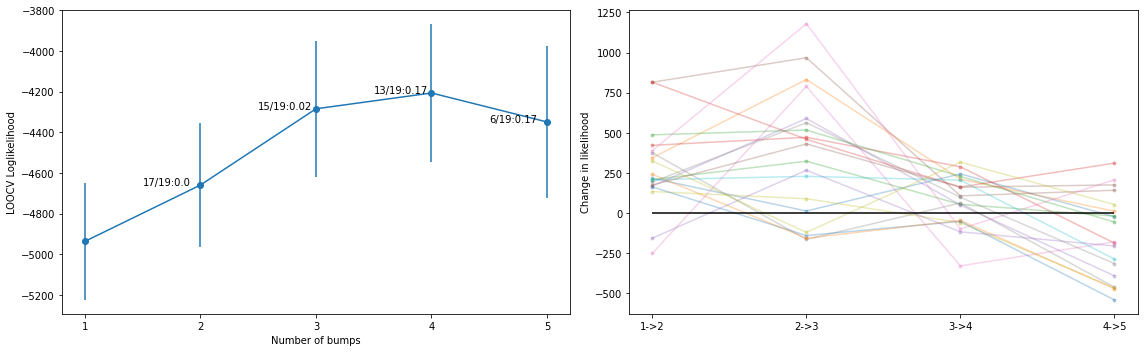

In [21]:
hsmm.plot_LOOCV(loocv_accuracy)

# Inspecting best model

In [22]:
estimates_speed = bests_speed.sel(n_bumps=3).drop_vars('n_bumps')
estimates_accuracy = bests_accuracy.sel(n_bumps=4).drop_vars('n_bumps')

### Bump probabilities

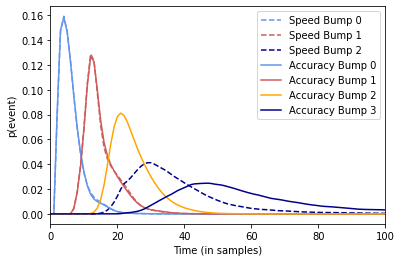

In [23]:
bumps = [0,1,2]
colors = ['cornflowerblue','indianred','darkblue']
for bump in bumps:
    plt.plot(estimates_speed.eventprobs.mean(dim=['trial']).sel(bump=bump),'--', label="Speed Bump "+str(bump), color=colors[bump])
bumps = [0,1,2,3]
colors = ['cornflowerblue','indianred','orange','darkblue']
for bump in bumps:
    plt.plot(estimates_accuracy.eventprobs.mean(dim=['trial']).sel(bump=bump), label="Accuracy Bump "+str(bump), color=colors[bump])
plt.ylabel('p(event)')
plt.xlabel('Time (in samples)')
plt.xlim(0,100)
plt.legend();

### Gamma distribution of stages

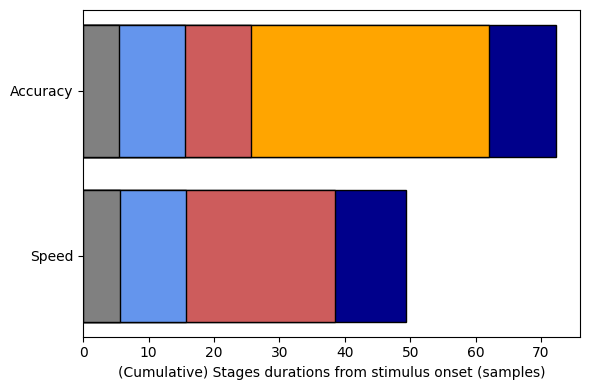

In [24]:
f, axs = plt.subplots(1,1, figsize=(6, 4),sharey=True, sharex=False,dpi=100)

cond = ['Speed', 'Accuracy']
color_spd = ['gray','cornflowerblue','indianred','darkblue']
color_acc = ['gray','cornflowerblue','indianred','orange','darkblue']
stages_accuracy = estimates_accuracy.parameters.isel(params=0).dropna('stage') * estimates_accuracy.parameters.isel(params=1).dropna('stage')+[0,5,5,5,5]
stages_speed = estimates_speed.parameters.isel(params=0).dropna('stage') * estimates_speed.parameters.isel(params=1).dropna('stage')+[0,5,5,5]

j = 0
for i in np.arange(len(stages_accuracy),0,-1):
    plt.barh(.5, stages_accuracy[:i].sum(), color=color_acc[i-1], edgecolor='k')
    if i <= len(stages_speed):
        plt.barh(-.5, stages_speed[:i].sum(), color=color_spd[i-1], edgecolor='k')
    j-=1
plt.yticks([-.5,.5],["Speed","Accuracy"])
plt.xlabel('(Cumulative) Stages durations from stimulus onset (samples)')
plt.tight_layout()
plt.show()

### Topography of bumps

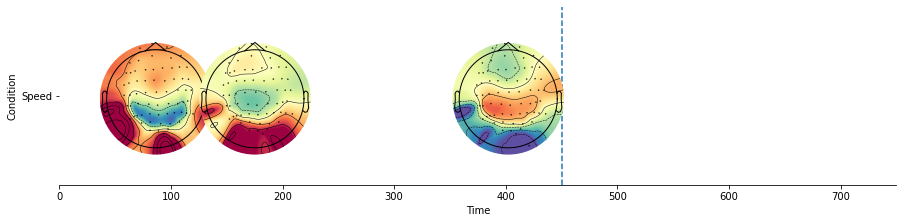

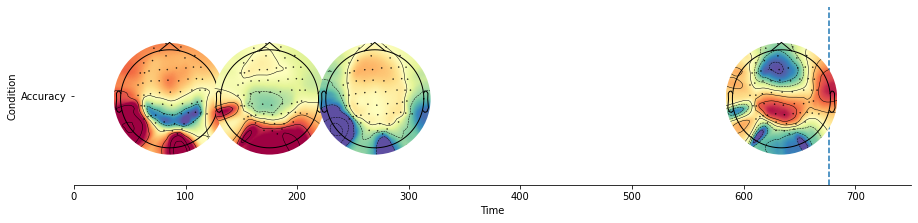

In [36]:
for condition in zip([estimates_speed, estimates_accuracy],
                     [init_speed, init_accuracy],
                     [hsmm_speed_data, hsmm_accuracy_data],
                    ['Speed', 'Accuracy']):
    electrodes = xr.DataArray(hsmm.reconstruct(condition[0].magnitudes, PCs, explained_var, means.data))
    hsmm.plot_topo_timecourse(electrodes, condition[1].mean_bump_times(condition[0].eventprobs),
                          raw.pick_types(eeg=True).info, bump_size=condition[1].bump_width_samples, time_step = 10, magnify=1, 
                          mean_rt = np.mean(condition[2].ends.data - condition[2].starts.data),max_time=750,
                          figsize=(15,3), ylabels={'Condition':[condition[3]]})
